In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras_preprocessing.image import img_to_array, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
#Create our directory paths to our images
train_data_dir = 'data/train'
test_data_dir = 'data/test'
valid_data_dir = 'data/validation'

In [3]:
#Let's plot the number of images in each classification directory

def bar_plot(dir):
  x=len(os.listdir(dir+'/NORMAL'))
  y=len(os.listdir(dir+'/PNEUMONIA'))
  category = ['NORMAL', 'PNEUMONIA']
  count = [x, y]
  plot = plt.bar(category,count) 
  plot[0].set_color('orange')
  plt.title('Number of values for each category')
  plt.show()

Training images:

NORMAL: 1341
PNEUMONIA: 3875
Total Training images: 5216
*************************************************


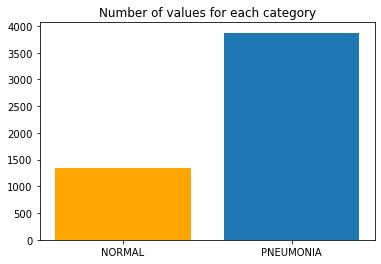

In [4]:
#Number of training images
print('Training images:\n')
print('NORMAL:', len(os.listdir(train_data_dir+'/NORMAL')))
print('PNEUMONIA:', len(os.listdir(train_data_dir+'/PNEUMONIA')))
print('Total Training images:', len(os.listdir(train_data_dir+'/NORMAL')) + len(os.listdir(train_data_dir+'/PNEUMONIA')))
print('*'*49)
bar_plot(train_data_dir)

Test images:

NORMAL: 234
PNEUMONIA: 390
Total Test images: 624
*************************************************


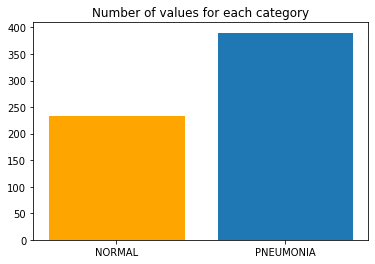

In [5]:
#Number of test images
print('Test images:\n')
print('NORMAL:', len(os.listdir(test_data_dir+'/NORMAL')))
print('PNEUMONIA:', len(os.listdir(test_data_dir+'/PNEUMONIA')))
print('Total Test images:', len(os.listdir(test_data_dir+'/NORMAL')) + len(os.listdir(test_data_dir+'/PNEUMONIA')))
print('*'*49)
bar_plot(test_data_dir)

Validation images:

NORMAL: 8
PNEUMONIA: 8
Total Validation images: 16
***********************************************


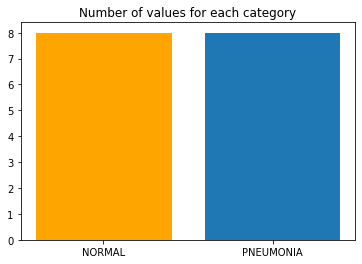

In [6]:
#Number of validation images
print('Validation images:\n')
print('NORMAL:', len(os.listdir(valid_data_dir+'/NORMAL')))
print('PNEUMONIA:', len(os.listdir(valid_data_dir+'/PNEUMONIA')))
print('Total Validation images:', len(os.listdir(valid_data_dir+'/NORMAL')) + len(os.listdir(valid_data_dir+'/PNEUMONIA')))
print('*'*47)
bar_plot(valid_data_dir)


In [7]:
# Get all the data in the directory data/train and reshape them

train_generator = ImageDataGenerator().flow_from_directory(
        train_data_dir, 
        target_size=(64, 64), 
        batch_size=5216)

Found 5216 images belonging to 2 classes.


In [8]:
# Get all the data in the directory data/test and reshape them

test_generator = ImageDataGenerator().flow_from_directory(
        test_data_dir, 
        target_size=(64, 64), 
        batch_size=624)

Found 624 images belonging to 2 classes.


In [9]:
# Get all the data in the directory data/validation and reshape them

val_generator = ImageDataGenerator().flow_from_directory(
    valid_data_dir, 
    target_size=(64, 64), 
    batch_size=16)

Found 16 images belonging to 2 classes.


In [10]:
#Create our different data sets

#Training set
X_train, y_train = next(train_generator)

#Test set
X_test, y_test = next(test_generator)

#Validation set
X_val, y_val = next(val_generator)

In [11]:
#Let's look at the shape of our data

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5216, 64, 64, 3)
(5216, 2)
(624, 64, 64, 3)
(624, 2)


#### Let's reshape our data ####

In [12]:
X_train

array([[[[ 29.,  29.,  29.],
         [ 29.,  29.,  29.],
         [ 30.,  30.,  30.],
         ...,
         [ 24.,  24.,  24.],
         [102., 102., 102.],
         [ 18.,  18.,  18.]],

        [[192., 192., 192.],
         [ 52.,  52.,  52.],
         [ 45.,  45.,  45.],
         ...,
         [ 27.,  27.,  27.],
         [ 45.,  45.,  45.],
         [ 32.,  32.,  32.]],

        [[193., 193., 193.],
         [191., 191., 191.],
         [ 28.,  28.,  28.],
         ...,
         [ 15.,  15.,  15.],
         [176., 176., 176.],
         [ 87.,  87.,  87.]],

        ...,

        [[ 38.,  38.,  38.],
         [ 39.,  39.,  39.],
         [ 37.,  37.,  37.],
         ...,
         [ 42.,  42.,  42.],
         [ 42.,  42.,  42.],
         [ 45.,  45.,  45.]],

        [[ 38.,  38.,  38.],
         [ 39.,  39.,  39.],
         [ 38.,  38.,  38.],
         ...,
         [ 42.,  42.,  42.],
         [ 43.,  43.,  43.],
         [ 42.,  42.,  42.]],

        [[ 37.,  37.,  37.],
       

In [13]:
X_train_unrow = X_train.reshape(5216, -1)
X_train_unrow.shape

(5216, 12288)

In [14]:
X_train_unrow

array([[29., 29., 29., ..., 45., 45., 45.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 4.,  4.,  4., ...,  5.,  5.,  5.],
       [60., 60., 60., ..., 14., 14., 14.],
       [44., 44., 44., ..., 19., 19., 19.]], dtype=float32)

In [15]:
X_test

array([[[[110., 110., 110.],
         [ 93.,  93.,  93.],
         [ 75.,  75.,  75.],
         ...,
         [ 69.,  69.,  69.],
         [ 63.,  63.,  63.],
         [ 52.,  52.,  52.]],

        [[110., 110., 110.],
         [ 88.,  88.,  88.],
         [ 58.,  58.,  58.],
         ...,
         [ 68.,  68.,  68.],
         [ 58.,  58.,  58.],
         [ 52.,  52.,  52.]],

        [[132., 132., 132.],
         [ 80.,  80.,  80.],
         [ 71.,  71.,  71.],
         ...,
         [ 71.,  71.,  71.],
         [ 62.,  62.,  62.],
         [ 46.,  46.,  46.]],

        ...,

        [[  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         ...,
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],

        [[  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         ...,
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],

        [[  0.,   0.,   0.],
       

In [16]:
X_test_unrow = X_test.reshape(624, -1)
X_test_unrow.shape

(624, 12288)

In [17]:
#X_test_unrow

In [18]:
#Taking a look at our y_train data
y_train

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [19]:
#Let's take a look at which index represents what class
train_generator.class_indices

{'normal': 0, 'pneumonia': 1}

In [20]:
y_train_final = y_train.T[[1]]
#y_train_final[:20]
y_train_final.shape

(1, 5216)

In [21]:
y_train_final = y_train_final.reshape(5216, 1)

In [22]:
#y_train_final = y_train.reshape(2, -1)

In [23]:
y_train_final.shape

(5216, 1)

In [24]:
y_train_final

array([[1.],
       [1.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]], dtype=float32)

In [25]:
#Let's take a look at our y_test data
#y_test

In [26]:
y_test_final = y_test.T[[1]]
#y_test_final[:20]

In [27]:
y_test_final.shape

(1, 624)

In [28]:
y_test_final = y_test_final.reshape(624, 1)

In [29]:
y_test_final.shape

(624, 1)

#### Let's take a look at a pneumonia image vs a normal image ####

In [30]:
#plt.imshow(X_train_unrow[0])
#plt.axis('off')
#plt.title('Normal X-Ray')
#plt.show()

In [31]:
#Lastly let's normalize our data
X_train_final = X_train_unrow / 255
X_test_final = X_test_unrow / 255


In [32]:
print(X_train_final.shape)
print(X_test_final.shape)
print(y_train_final.shape)
print(y_test_final.shape)
#print(X_val.shape)
#print(y_val.shape)

(5216, 12288)
(624, 12288)
(5216, 1)
(624, 1)


### Building Our Initial Model ###

In [33]:
model_1 = Sequential()
model_1.add(Dense(50, activation = 'relu', input_shape = (12288,)))
model_1.add(Dense(1, activation = 'sigmoid'))

In [34]:
model_1.compile(loss = 'binary_crossentropy', optimizer = 'sgd', metrics = ['acc'])

In [35]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                614450    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 614,501
Trainable params: 614,501
Non-trainable params: 0
_________________________________________________________________


In [36]:
results_1 = model_1.fit(X_train_final, y_train_final, epochs = 5, batch_size = 50, validation_data= (X_test_final, y_test_final))

Epoch 1/5
105/105 [==============================] - 1s 6ms/step - loss: 0.4814 - acc: 0.8043 - val_loss: 0.8705 - val_acc: 0.6250
Epoch 2/5
105/105 [==============================] - 1s 5ms/step - loss: 0.3177 - acc: 0.8658 - val_loss: 0.4822 - val_acc: 0.7436
Epoch 3/5
105/105 [==============================] - 1s 5ms/step - loss: 0.2414 - acc: 0.9057 - val_loss: 1.0638 - val_acc: 0.6410
Epoch 4/5
105/105 [==============================] - 1s 5ms/step - loss: 0.2176 - acc: 0.9112 - val_loss: 1.6716 - val_acc: 0.6282
Epoch 5/5
105/105 [==============================] - 1s 5ms/step - loss: 0.2063 - acc: 0.9181 - val_loss: 1.5313 - val_acc: 0.6362


#### Loss and Accuracy Curves ####

In [37]:
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_acc'])
    plt.plot(history['acc'])
    plt.legend(['val_acc', 'acc'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()
    

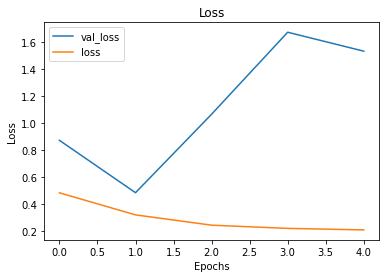

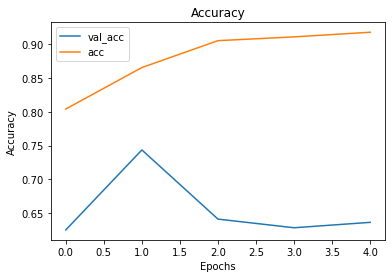

In [38]:
visualize_training_results(results_1)

### Model with More Layers ###

In [44]:
model_2 = Sequential()
model_2.add(Dense(50, activation = 'relu', input_shape = (12288,)))
model_2.add(Dense(35, activation = 'relu'))
model_2.add(Dense(25, activation = 'relu'))
model_2.add(Dense(15, activation = 'relu'))
model_2.add(Dense(1, activation = 'sigmoid'))

In [45]:
model_2.compile(loss = 'binary_crossentropy', optimizer = 'sgd', metrics = ['acc'])

In [46]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 50)                614450    
_________________________________________________________________
dense_8 (Dense)              (None, 35)                1785      
_________________________________________________________________
dense_9 (Dense)              (None, 25)                900       
_________________________________________________________________
dense_10 (Dense)             (None, 15)                390       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 16        
Total params: 617,541
Trainable params: 617,541
Non-trainable params: 0
_________________________________________________________________


In [47]:
results_2 = model_1.fit(X_train_final, y_train_final, epochs = 5, batch_size = 50, validation_data= (X_test_final, y_test_final))

Epoch 1/5
105/105 [==============================] - 1s 5ms/step - loss: 0.1383 - acc: 0.9480 - val_loss: 0.4730 - val_acc: 0.7933
Epoch 2/5
105/105 [==============================] - 1s 6ms/step - loss: 0.1315 - acc: 0.9505 - val_loss: 0.6164 - val_acc: 0.7756
Epoch 3/5
105/105 [==============================] - 1s 5ms/step - loss: 0.1380 - acc: 0.9502 - val_loss: 0.6965 - val_acc: 0.7596
Epoch 4/5
105/105 [==============================] - 1s 5ms/step - loss: 0.1337 - acc: 0.9471 - val_loss: 1.0839 - val_acc: 0.7051
Epoch 5/5
105/105 [==============================] - 1s 5ms/step - loss: 0.1268 - acc: 0.9505 - val_loss: 1.3360 - val_acc: 0.6827


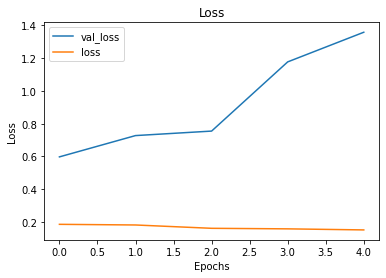

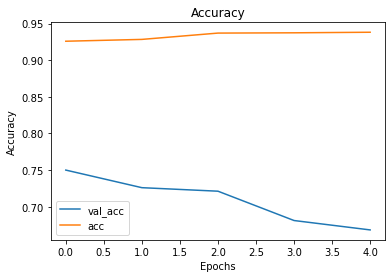

In [43]:
visualize_training_results(results_2)

### Model with more epochs ###

In [48]:
model_3 = Sequential()
model_3.add(Dense(50, activation = 'relu', input_shape = (12288,)))
model_3.add(Dense(35, activation = 'relu'))
model_3.add(Dense(25, activation = 'relu'))
model_3.add(Dense(15, activation = 'relu'))
model_3.add(Dense(1, activation = 'sigmoid'))

In [49]:
model_3.compile(loss = 'binary_crossentropy', optimizer = 'sgd', metrics = ['acc'])

In [54]:
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 50)                614450    
_________________________________________________________________
dense_13 (Dense)             (None, 35)                1785      
_________________________________________________________________
dense_14 (Dense)             (None, 25)                900       
_________________________________________________________________
dense_15 (Dense)             (None, 15)                390       
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 16        
Total params: 617,541
Trainable params: 617,541
Non-trainable params: 0
_________________________________________________________________


In [55]:
results_3 = model_3.fit(X_train_final, y_train_final, epochs = 10, batch_size = 50, validation_data= (X_test_final, y_test_final))

Epoch 1/10
105/105 [==============================] - 1s 6ms/step - loss: 0.5274 - acc: 0.7521 - val_loss: 0.5762 - val_acc: 0.6266
Epoch 2/10
105/105 [==============================] - 1s 6ms/step - loss: 0.4394 - acc: 0.7979 - val_loss: 0.9025 - val_acc: 0.6250
Epoch 3/10
105/105 [==============================] - 1s 5ms/step - loss: 0.3506 - acc: 0.8499 - val_loss: 0.4469 - val_acc: 0.7724
Epoch 4/10
105/105 [==============================] - 1s 5ms/step - loss: 0.2740 - acc: 0.8878 - val_loss: 0.3560 - val_acc: 0.8349
Epoch 5/10
105/105 [==============================] - 1s 5ms/step - loss: 0.2363 - acc: 0.9068 - val_loss: 0.8073 - val_acc: 0.6955
Epoch 6/10
105/105 [==============================] - 1s 5ms/step - loss: 0.2205 - acc: 0.9107 - val_loss: 0.3772 - val_acc: 0.8221
Epoch 7/10
105/105 [==============================] - 1s 6ms/step - loss: 0.1874 - acc: 0.9250 - val_loss: 1.3844 - val_acc: 0.6474
Epoch 8/10
105/105 [==============================] - 1s 5ms/step - loss: 0.

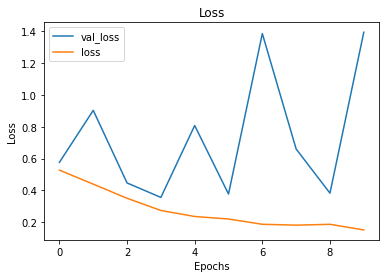

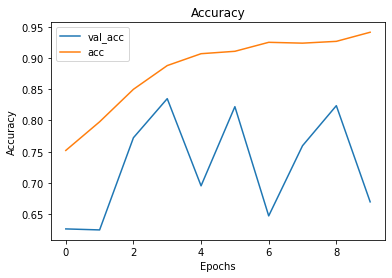

In [56]:
visualize_training_results(results_3)